In [1]:
# import basic library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
dataset = pd.read_csv('C://Users//Syeda Tazneen//Downloads//USA_Housing.csv')
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
dataset = dataset.drop(['Address'], axis=1)

In [4]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [5]:
# Data Preprocessing 
# 1) check missing value - satisfied
# 2) Encoding - not required
# 3) Outlier treatement 
# 4) Feature Scaling
# 5) Imbalance check - only applicable in classification problem


In [6]:
dataset.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [8]:
# check whether outlier there or not
# if outlier found - median
# if there is no outlier - mean

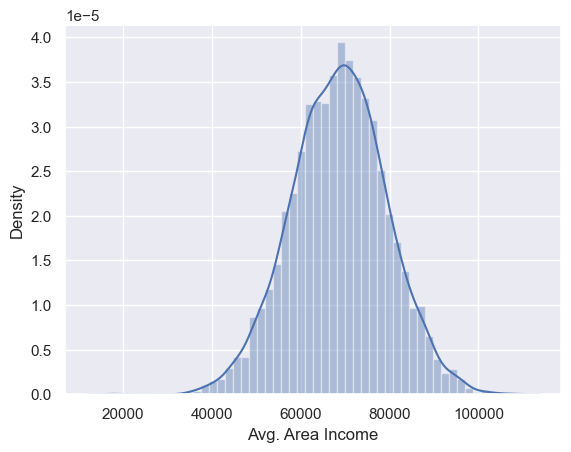

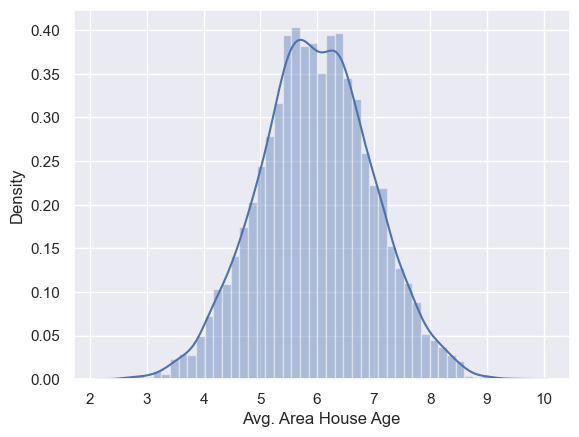

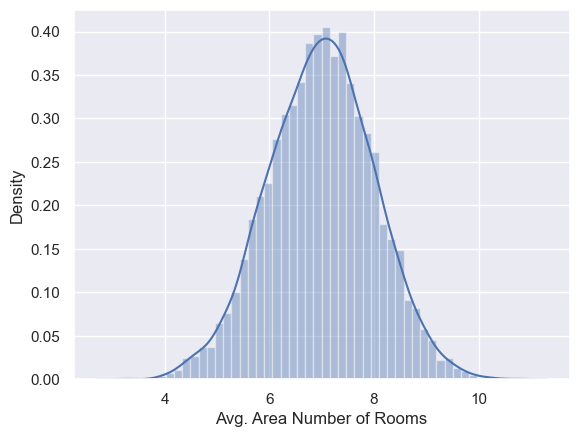

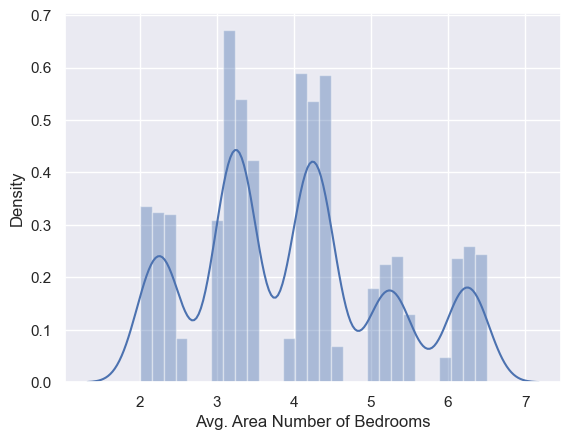

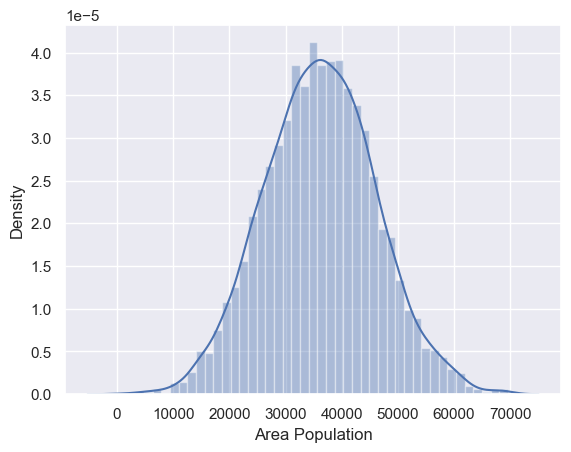

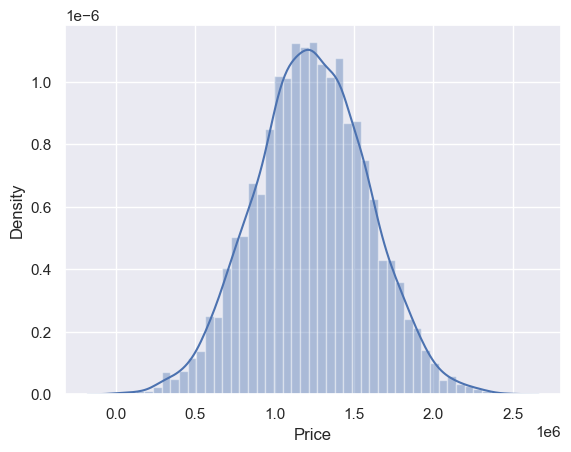

In [9]:
def distplots(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distplots(i)

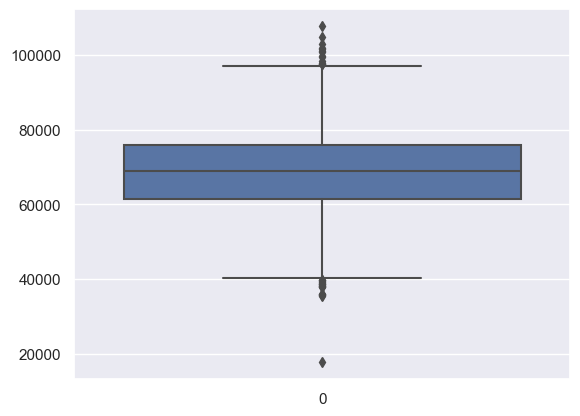

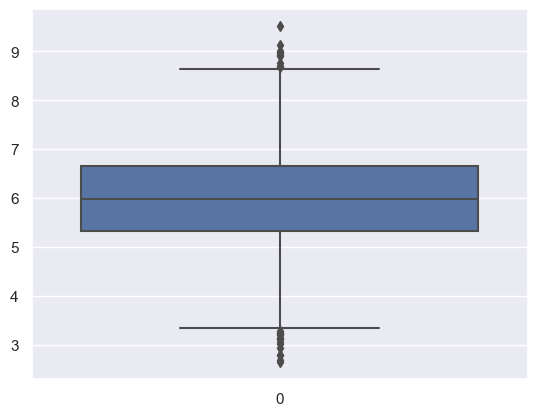

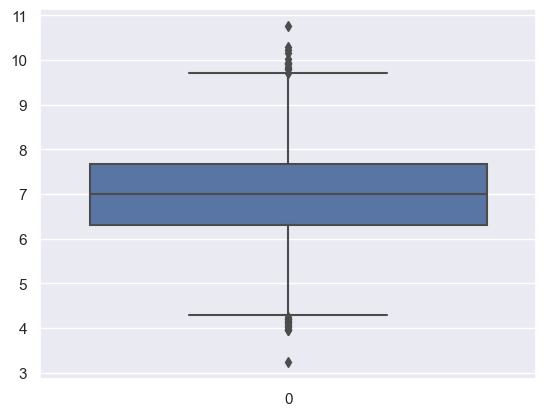

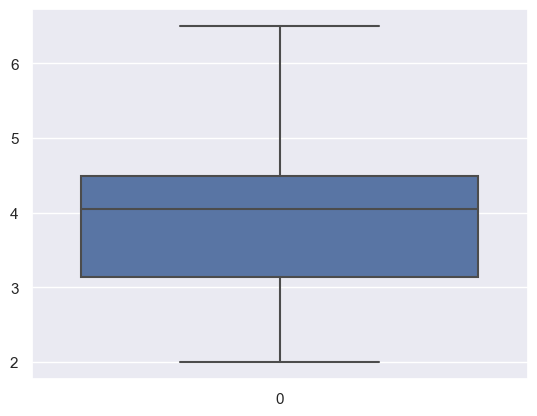

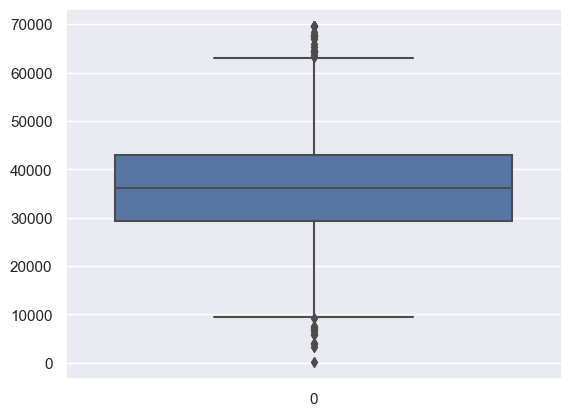

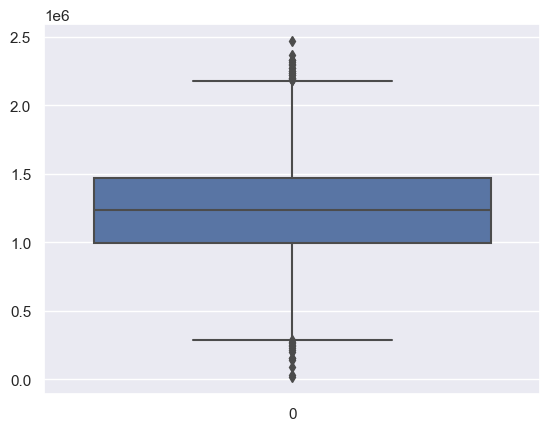

In [10]:
# check boxplot
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

In [11]:
dataset.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
dtype: int64

In [12]:
dataset['Avg. Area Income'] = dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())

In [13]:
dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].median())

In [14]:
dataset['Avg. Area Number of Bedrooms'] = dataset['Avg. Area Number of Bedrooms'].fillna(dataset['Avg. Area Number of Bedrooms'].mean())

In [15]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


###### Since it's regression problem, we have to treat outlier - mandatory step

In [17]:
# Avg. Area Income
Q1 = dataset['Avg. Area Income'].quantile(0.25)
Q3 = dataset['Avg. Area Income'].quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(pos_outlier)
print(neg_outlier)

61485.1501925
75766.51910250001
14281.368910000012
97188.57246750002
40063.096827499976


In [18]:
# Transformation approach - capping method

dataset['Avg. Area Income'] = np.where(dataset['Avg. Area Income'] > pos_outlier, pos_outlier,
                                      np.where(dataset['Avg. Area Income'] <neg_outlier, neg_outlier,
                                            dataset['Avg. Area Income']  ))

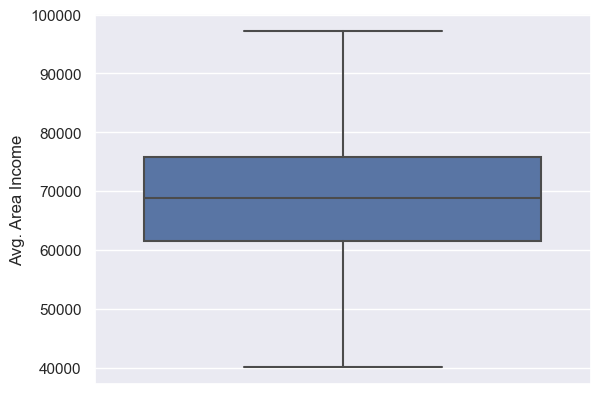

In [19]:
sns.boxplot(y = 'Avg. Area Income', data = dataset)
plt.show()

In [20]:
# Avg. Area House Age
Q1 = dataset['Avg. Area House Age'].quantile(0.25)
Q3 = dataset['Avg. Area House Age'].quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(pos_outlier)
print(neg_outlier)

5.32228301575
6.65080847925
1.3285254635000001
8.6435966745
3.3294948205


In [21]:
# Transformation approach - capping method

dataset['Avg. Area House Age'] = np.where(dataset['Avg. Area House Age'] > pos_outlier, pos_outlier,
                                      np.where(dataset['Avg. Area House Age'] <neg_outlier, neg_outlier,
                                            dataset['Avg. Area House Age']  ))

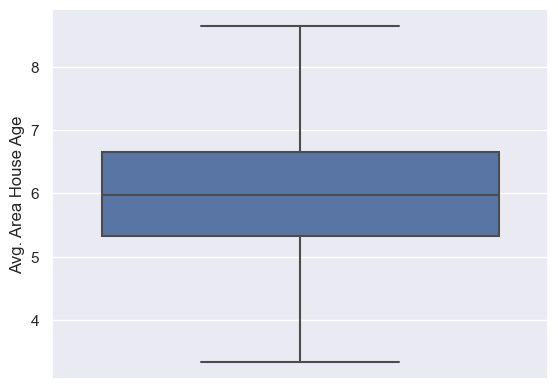

In [22]:
sns.boxplot(y = 'Avg. Area House Age', data = dataset)
plt.show()

In [23]:
# Avg. Area Number of Rooms
Q1 = dataset['Avg. Area Number of Rooms'].quantile(0.25)
Q3 = dataset['Avg. Area Number of Rooms'].quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(pos_outlier)
print(neg_outlier)

6.29969161825
7.6652805545
1.36558893625
9.713663958875
4.251308213874999


In [24]:
# Transformation approach - capping method

dataset['Avg. Area Number of Rooms'] = np.where(dataset['Avg. Area Number of Rooms'] > pos_outlier, pos_outlier,
                                      np.where(dataset['Avg. Area Number of Rooms'] <neg_outlier, neg_outlier,
                                            dataset['Avg. Area Number of Rooms']  ))

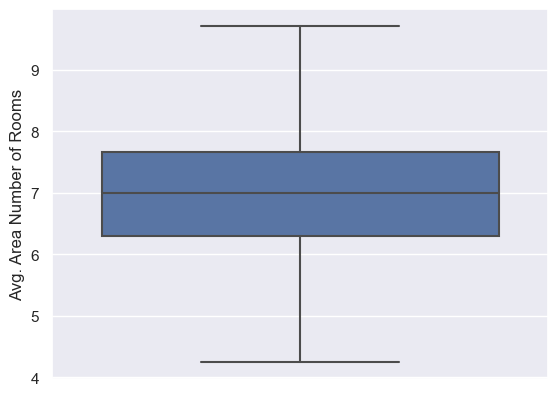

In [25]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data = dataset)
plt.show()

In [26]:
# Area Population
Q1 = dataset['Area Population'].quantile(0.25)
Q3 = dataset['Area Population'].quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(pos_outlier)
print(neg_outlier)

29403.9287
42861.29077
13457.36207
63047.333875
9217.885595000003


In [27]:
# Transformation approach - capping method

dataset['Area Population'] = np.where(dataset['Area Population'] > pos_outlier, pos_outlier,
                                      np.where(dataset['Area Population'] <neg_outlier, neg_outlier,
                                            dataset['Area Population']  ))

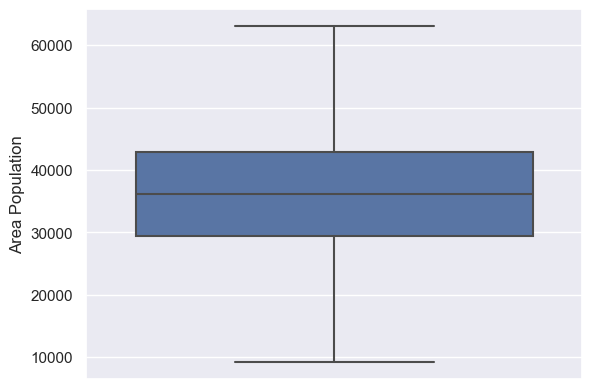

In [28]:
sns.boxplot(y = 'Area Population', data = dataset)
plt.show()

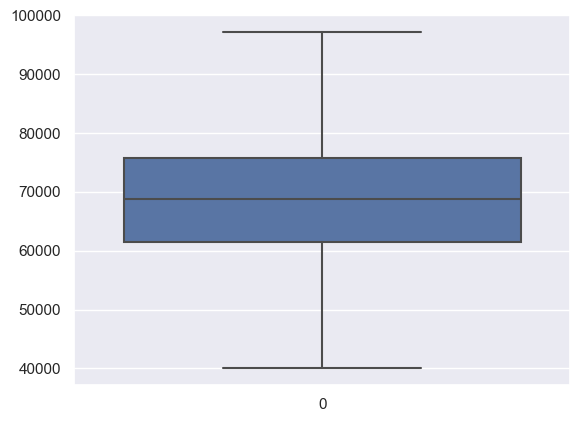

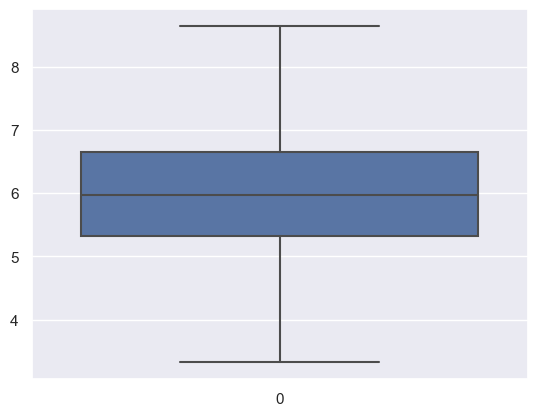

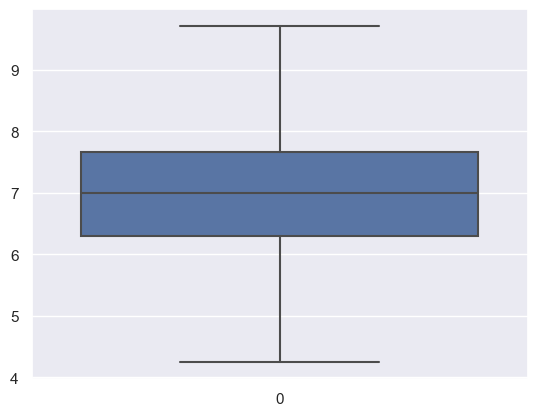

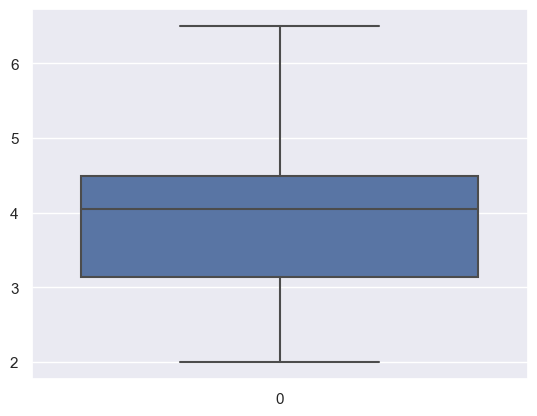

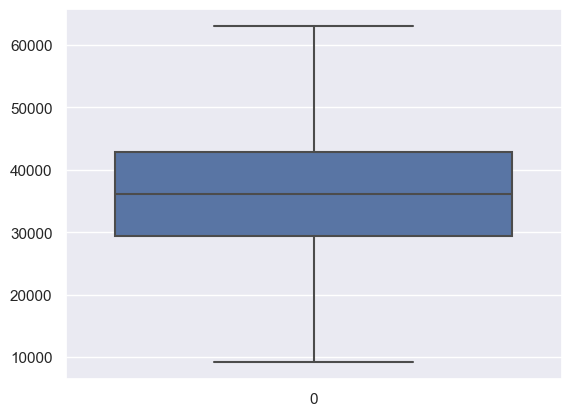

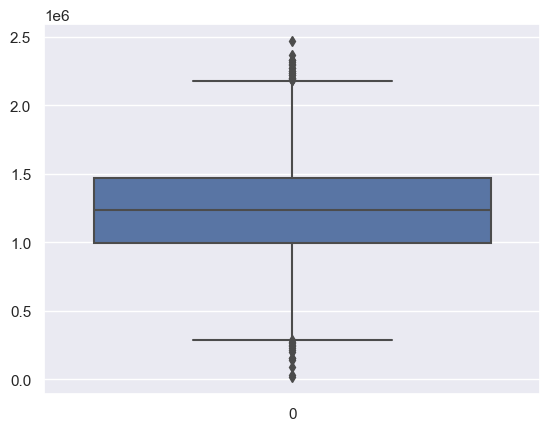

In [29]:
# check boxplot
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

# Advance EDA part
### pandas profiling
### dtale method 

In [30]:
# method 1 - pandas profiling
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# part 2 - EDA : dtale

In [32]:
#!pip install dtale

In [33]:
import dtale
import dtale.app as dtale_app

In [34]:
dtale.show(dataset)

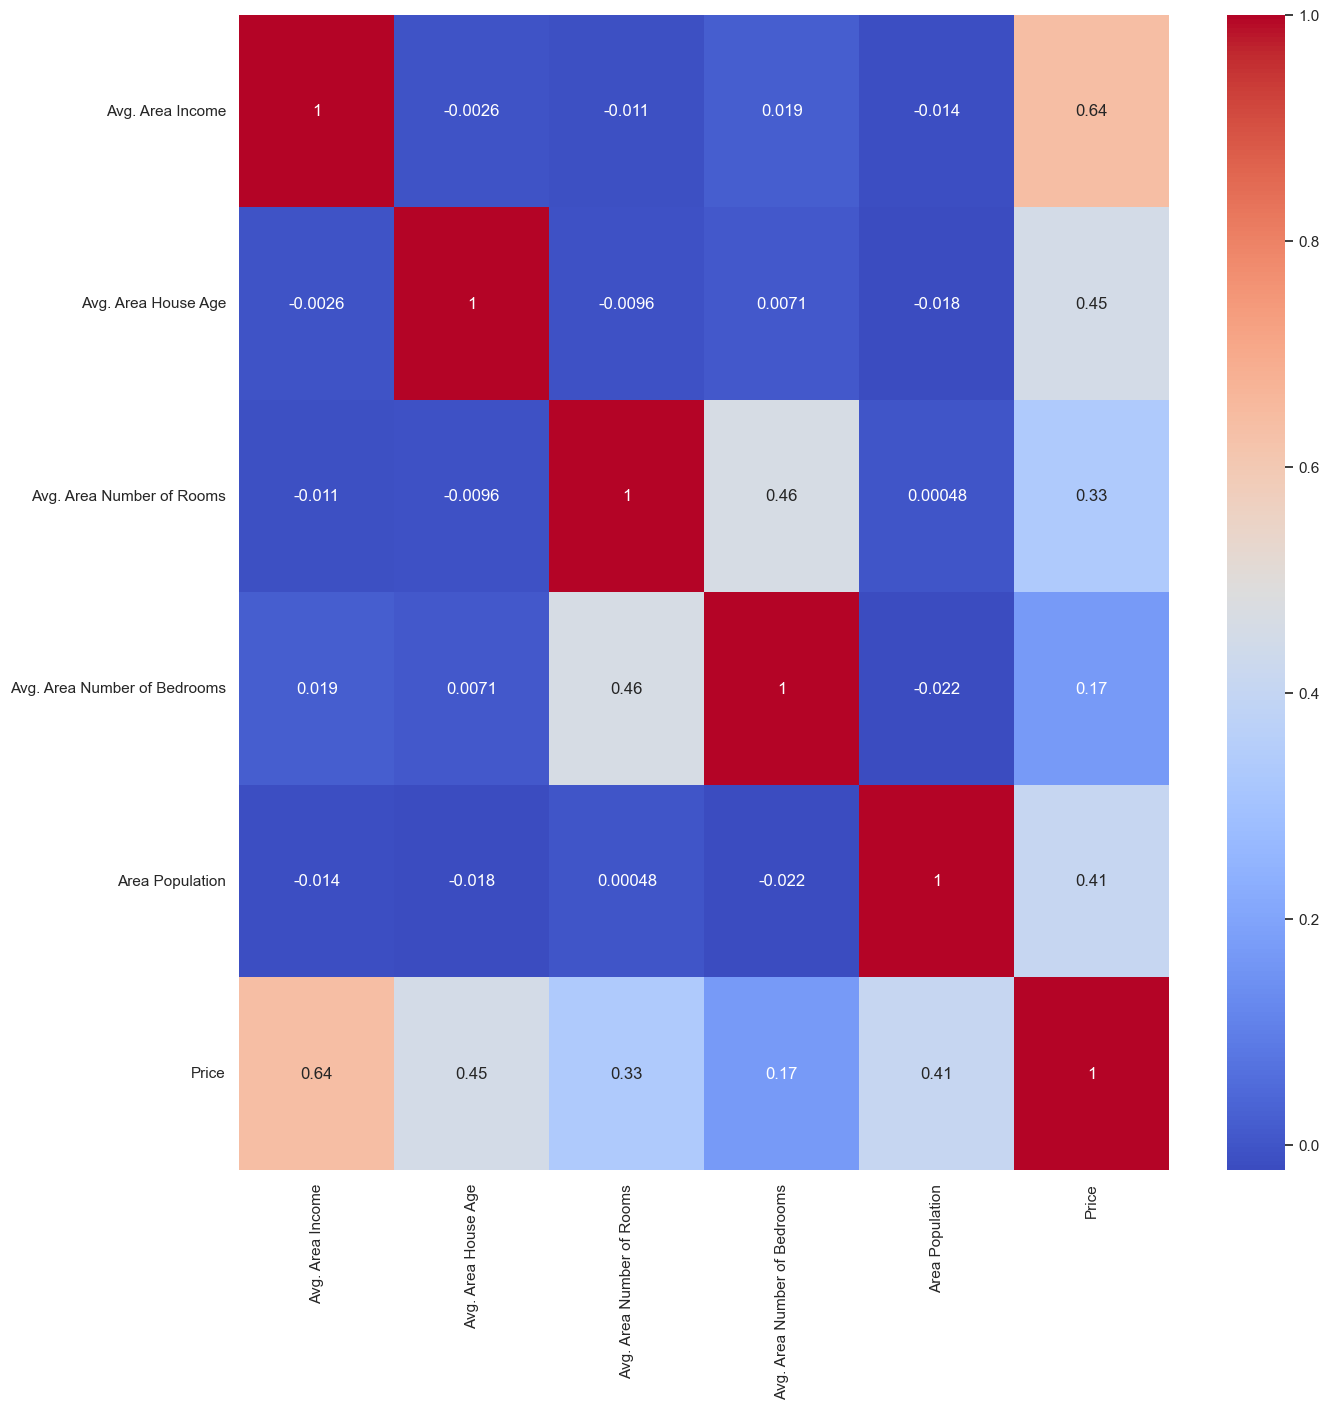

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [36]:
# Feature Scaling is required

In [37]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [38]:
# split the data into ind and dep variable
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [39]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [40]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [ ]:
dataset.describe()

In [41]:
# feature scaling with ind variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
x_scaled

array([[ 1.03638167, -0.29854096,  0.02161971,  0.08764825, -1.32562204],
       [ 1.00830945,  0.02574693, -0.25638091, -0.72296578,  0.40704855],
       [-0.69045702, -0.11308223,  1.5231794 ,  0.93068684,  0.07332638],
       ...,
       [-0.49150127,  1.29000432, -2.17958546, -1.50115524, -0.29336339],
       [-0.05543662, -0.44898526,  0.14241618,  1.18197719,  0.65575453],
       [-0.29100625,  0.01501175, -0.19494681,  0.07143597,  1.04877464]])

In [43]:
pd.DataFrame(x_scaled).shape

(5000, 5)

In [45]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,3.981874,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,1.233756,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,2.000000,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,6.500000,63047.333875,2.469066e+06


# Assumption : There should not be any multicollinearity - Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_scaled

vif = pd.DataFrame()

vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for 
                                    i in range(variable.shape[1])]

vif['Features'] = x.columns

In [ ]:
vif

##### Hence, we can say that there is no multicollinearity there in my USAHousing Price dataset

In [ ]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=102)

# Building LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
print(lr.coef_)
print()
print(lr.intercept_)

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test))

# Regression with OLS method

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [ ]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

In [ ]:
plt.scatter(y_test, y_pred_test)

In [ ]:
plt.scatter(y_train, y_pred_train)

In [ ]:
# check residual should be normally distributed
sns.distplot((y_test - y_pred_test), bins=50)

In [ ]:
delta = y_test - y_pred_test
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_test))
print()
print("MAPE :", metrics.mean_absolute_percentage_error(y_test, y_pred_test)*100)
print()
print("MSE :", metrics.mean_squared_error(y_test, y_pred_test))
print()
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Regularization - handling overfitting problem

### Lasso - L1 regularization : slope value would be exact zero or closure to zero
### Ridge - L2 regularization : slope value should be closure to zero
### ElasticNet - L1 + L2 regularisation : mix of both

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Lasso 

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)

In [ ]:
y_pred_train_ls = lasso_model.predict(x_train)
y_pred_test_ls = lasso_model.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_ls))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ls))

# Ridge

In [ ]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(x_train, y_train)

In [ ]:
y_pred_train_rd = ridge_model.predict(x_train)
y_pred_test_rd = ridge_model.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_rd))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rd))

# ElasticNet

In [ ]:
elasticnet = ElasticNet(alpha=0.02, l1_ratio=0.3)
elasticnet.fit(x_train, y_train)

In [ ]:
y_pred_train_el = elasticnet.predict(x_train)
y_pred_test_el = elasticnet.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_el))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_el))

# Gradient Descent 

### please note, gradient descent always works with scaled data

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.25, random_state=102)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train1, y_train1)

In [ ]:
y_pred_train_sgd = sgd.predict(x_train1)
y_pred_test_sgd = sgd.predict(x_test1)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train1, y_pred_train_sgd))
print()
print("Test Accuracy :", r2_score(y_test1, y_pred_test_sgd))

# End_To_End Project - Linear Regression Model